In [0]:
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN 
from sklearn.preprocessing import StandardScaler

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
scaler = StandardScaler()

#K-means

##Iris Dataset

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X[:,1:3])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

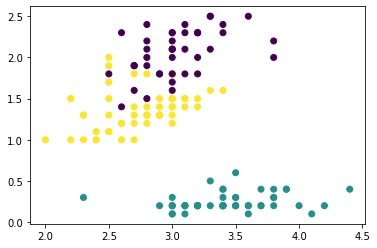

In [7]:
plt.scatter(X[:,1], X[:,3], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black' )

##HTRU2 Dataset

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/ta-verma/DataSets/master/HTRU_2.csv',header=None)
df = df.drop(8, axis=1)
df = df.to_numpy()


scaler.fit(df)

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[:,2:4])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

centroids :  [0.2453806  0.45587228] [ 5.74185508 36.80985418] [ 3.41261149 15.31424476]


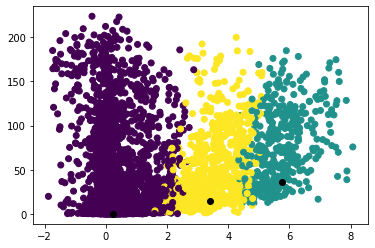

In [10]:
plt.scatter(df[:,2], df[:,4], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
print("centroids : ",*centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black' )

#Agglomerative Clustering

##Iris Dataset

In [11]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X[:,1:3])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [12]:
agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0])

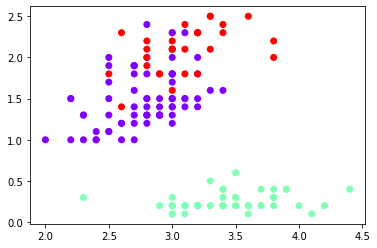

In [13]:
plt.scatter(X[:,1], X[:,3], c=agg.labels_, cmap='rainbow')

###Dendogram

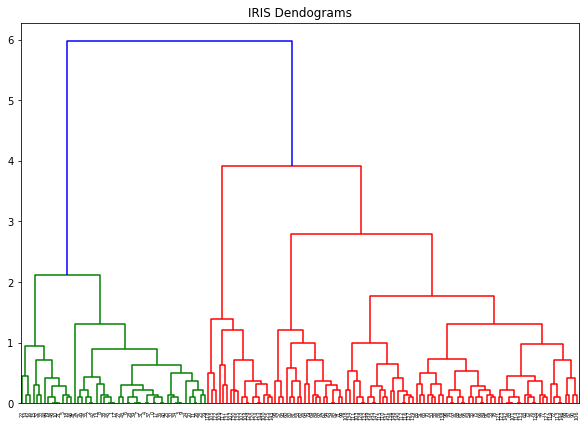

In [14]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("IRIS Dendograms")
dend = shc.dendrogram(shc.linkage(X[:,1:3],method='complete'))

##HTRU2 Dataset

In [15]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(df[:,2:4])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [16]:
agg.labels_

array([1, 1, 1, ..., 1, 1, 1])

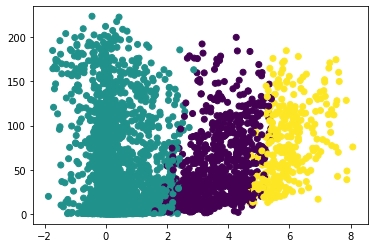

In [17]:
plt.scatter(df[:,2], df[:,4], c=agg.labels_, cmap='viridis')

#DBScan

##Iris Dataset

In [18]:
dbs = DBSCAN(eps=0.4,min_samples=5,metric='euclidean')
dbs.fit(X[:,1:3])

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [19]:
dbs.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

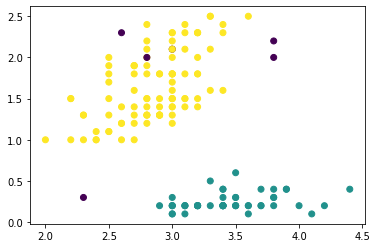

In [20]:
plt.scatter(X[:,1], X[:,3], c=dbs.labels_, cmap='viridis')

##HTRU2 Dataset

In [21]:
dbs = DBSCAN(eps=0.4,min_samples=8,metric='euclidean')
dbs.fit(df[:,2:4])

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=8, n_jobs=None, p=None)

In [22]:
dbs.labels_

array([0, 0, 0, ..., 0, 0, 0])

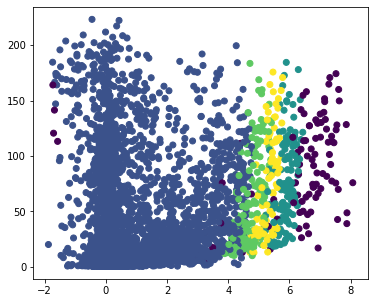

In [23]:
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(df[:,2], df[:,4], c=dbs.labels_, cmap='viridis',)